In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
ep = 0.1

In [2]:
cwd = os.getcwd()
File = cwd + '/adult_age_gender_race_dataset.csv'
df = pd.read_csv(File)

In [3]:
MinAge = df.Age.min()
MaxAge = df.Age.max() # Sensitivity for Age atrribute
Bins = range(MinAge,MaxAge+1,5)
counts, bins = np.histogram(df.Age, bins=Bins)
print(counts)
print(bins)

[3130 4066 4264 4363 4103 3745 3025 2142 1691 1024  540  273  116   33]
[17 22 27 32 37 42 47 52 57 62 67 72 77 82 87]


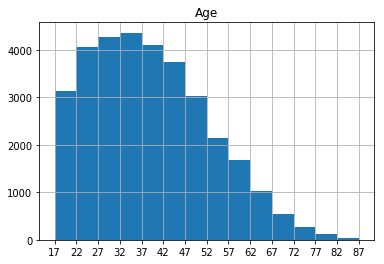

In [4]:
hist = df.hist(column='Age',grid=True,bins=Bins)
plt.xticks(Bins)
plt.show()

In [5]:
def laplaceMechanism(x, epsilon):
    x +=  np.random.laplace(0, epsilon)
    return x

laplaceMechanism_v = np.vectorize(laplaceMechanism)

In [6]:
err_list  = []
new_count = []
EP = np.linspace(0.1,1,10)
for ep in EP:
    countsPrime = laplaceMechanism_v(counts,MaxAge/ep)
    new_count.append(countsPrime)
    error = counts - countsPrime
    err_list.append(np.mean(np.abs(error)))


<Container object of 14 artists>

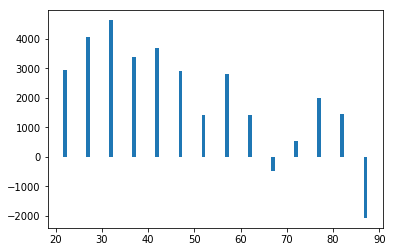

In [7]:
plt.bar(Bins[1::],height=new_count[0])

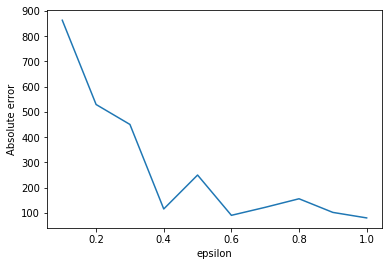

In [8]:
plt.plot(EP,err_list)
plt.ylabel('Absolute error')
plt.xlabel('epsilon')
plt.show()